<h1>Patient Survival Prediction</h1>
<hr>
<h2>Project 4</h2>
<p>This project predicts the survival of pacients in a UCI.</p>
<hr>

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from autoviz import data_cleaning_suggestions

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from utilerias import missing_values_table


%matplotlib inline

In [3]:
df_patients = pd.read_csv('../datasets/dataset_eda.csv')

<hr>
<h2>Preprocessing</h2>
<hr>
<p>Missing Values Treatment</p>

In [4]:
df_patients.head()

,Unnamed: 0,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [5]:
df_patients.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
missing_values_table(df_patients).style.background_gradient(cmap='Blues')

Sumary :
Columns     :186
Null values :175


,Missing Values,% of Total Values
h1_bilirubin_max,84619,92.300000
h1_bilirubin_min,84619,92.300000
h1_lactate_min,84369,92.000000
h1_lactate_max,84369,92.000000
h1_albumin_max,83824,91.400000
h1_albumin_min,83824,91.400000
h1_pao2fio2ratio_min,80195,87.400000
h1_pao2fio2ratio_max,80195,87.400000
h1_arterial_ph_min,76424,83.300000
h1_arterial_ph_max,76424,83.300000


<AxesSubplot:>

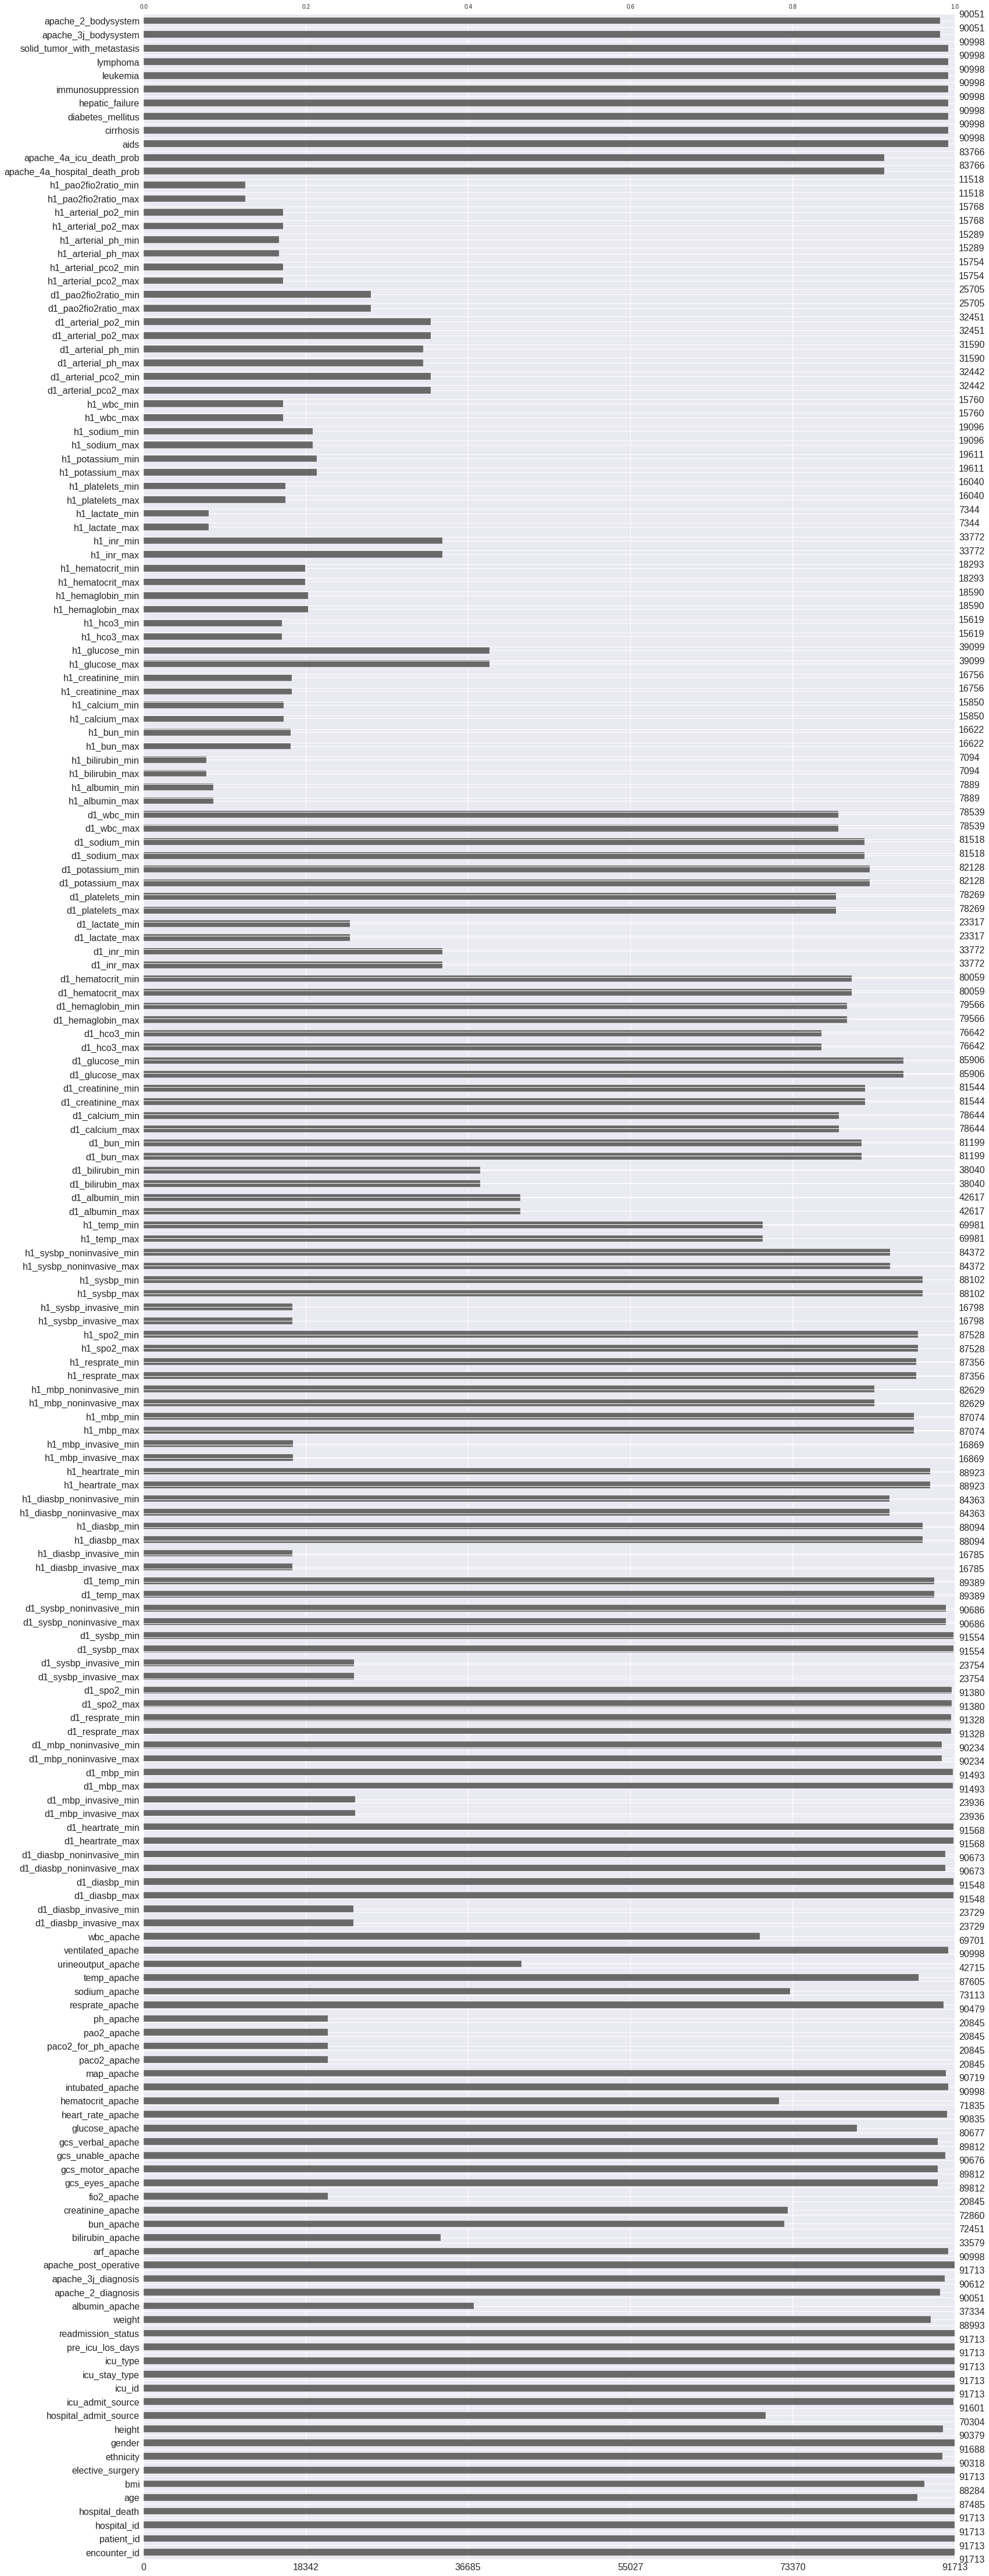

In [7]:
msno.bar(df_patients)

In [9]:
print('Features and their values')
print('=======================')
for feature in df_patients:
    print(f'{feature} ==> {df_patients[feature].value_counts()}')

Features and their values
encounter_id ==> 66154     1
76188     1
37789     1
108084    1
33405     1
         ..
65127     1
33600     1
130065    1
81357     1
1671      1
Name: encounter_id, Length: 91713, dtype: int64
patient_id ==> 25312    1
14664    1
60980    1
47973    1
32805    1
        ..
48476    1
90988    1
15402    1
75350    1
53612    1
Name: patient_id, Length: 91713, dtype: int64
hospital_id ==> 118    4333
19     3925
188    3095
161    2792
70     2754
       ... 
23        7
4         7
93        6
95        6
130       2
Name: hospital_id, Length: 147, dtype: int64
hospital_death ==> 0    83798
1     7915
Name: hospital_death, dtype: int64
age ==> 67.0    2271
68.0    2173
71.0    2141
72.0    2110
66.0    2059
        ... 
19.0     343
20.0     338
18.0     259
17.0     126
16.0      44
Name: age, Length: 74, dtype: int64
bmi ==> 14.844926    443
67.814990    422
24.017768     87
24.208110     86
27.359332     82
            ... 
61.796764      1
23.241435   

In [10]:
#lets delete some features
#1) those that seems not related
lstFeaturesToDrop1 = ['encounter_id', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'patient_id', 'hospital_id', 'readmission_status']
#2) those with 50% of missing values or more.
lstFeaturesToDrop2 = ['h1_bilirubin_max'
,'h1_bilirubin_min'
,'h1_lactate_min'
,'h1_lactate_max'
,'h1_albumin_max'
,'h1_albumin_min'
,'h1_pao2fio2ratio_min'
,'h1_pao2fio2ratio_max'
,'h1_arterial_ph_min'
,'h1_arterial_ph_max'
,'h1_hco3_min'
,'h1_hco3_max'
,'h1_arterial_pco2_min'
,'h1_arterial_pco2_max'
,'h1_wbc_max'
,'h1_wbc_min'
,'h1_arterial_po2_max'
,'h1_arterial_po2_min'
,'h1_calcium_min'
,'h1_calcium_max'
,'h1_platelets_max'
,'h1_platelets_min'
,'h1_bun_min'
,'h1_bun_max'
,'h1_creatinine_min'
,'h1_creatinine_max'
,'h1_diasbp_invasive_max'
,'h1_diasbp_invasive_min'
,'h1_sysbp_invasive_max'
,'h1_sysbp_invasive_min'
,'h1_mbp_invasive_min'
,'h1_mbp_invasive_max'
,'h1_hematocrit_min'
,'h1_hematocrit_max'
,'h1_hemaglobin_max'
,'h1_hemaglobin_min'
,'h1_sodium_max'
,'h1_sodium_min'
,'h1_potassium_min'
,'h1_potassium_max'
,'ph_apache'
,'pao2_apache'
,'paco2_for_ph_apache'
,'paco2_apache'
,'fio2_apache'
,'d1_lactate_max'
,'d1_lactate_min'
,'d1_diasbp_invasive_min'
,'d1_diasbp_invasive_max'
,'d1_sysbp_invasive_max'
,'d1_sysbp_invasive_min'
,'d1_mbp_invasive_min'
,'d1_mbp_invasive_max'
,'d1_pao2fio2ratio_min'
,'d1_pao2fio2ratio_max'
,'d1_arterial_ph_min'
,'d1_arterial_ph_max'
,'d1_arterial_pco2_max'
,'d1_arterial_pco2_min'
,'d1_arterial_po2_min'
,'d1_arterial_po2_max'
,'bilirubin_apache'
,'h1_inr_max'
,'d1_inr_min'
,'h1_inr_min'
,'d1_inr_max'
,'albumin_apache'
,'d1_bilirubin_min'
,'d1_bilirubin_max'
,'h1_glucose_min'
,'h1_glucose_max'
,'d1_albumin_min'
,'d1_albumin_max'
,'urineoutput_apache']

In [11]:
df_patients.drop(lstFeaturesToDrop1+lstFeaturesToDrop2, axis=1, inplace=True)

In [12]:
#shape of resultant
df_patients.shape

(91713, 104)

In [13]:
#let's check out for duplicate values out
df_patients.duplicated().sum()

0

In [14]:
#lets count registers with null columns, those with 80 or more empty features will be deleted
null_cols = df_patients.isnull().sum(axis=1).sort_values(ascending=False)

null_cols[null_cols>=80]

33104    94
3011     94
90275    86
36063    84
43775    84
35421    84
35608    83
18952    82
13063    82
33310    82
30485    82
24967    82
21161    82
12563    82
13717    81
13913    81
37376    81
17954    81
20351    80
10486    80
34288    80
18868    80
34889    80
33524    80
29950    80
36849    80
30326    80
dtype: int64

In [15]:
#lets delete those 295 registers with more than 50 null features
df_patients[df_patients.index.isin(null_cols[null_cols>=80].index)]

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_type,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
3011,0,NaN,24.710573,0,Caucasian,M,172.70,Med-Surg ICU,0.501389,73.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10486,0,88.0,22.363664,0,Caucasian,M,180.30,Med-Surg ICU,0.000694,72.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
12563,0,49.0,45.281036,0,Caucasian,M,180.30,Med-Surg ICU,2.300000,147.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13063,0,58.0,37.163388,0,Caucasian,F,165.10,Med-Surg ICU,2.013889,101.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13717,0,18.0,NaN,0,Caucasian,M,NaN,Med-Surg ICU,0.059722,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13913,0,75.0,31.877288,0,Caucasian,NaN,178.00,Med-Surg ICU,0.000000,101.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
17954,1,NaN,22.452116,0,Other/Unknown,F,165.10,Med-Surg ICU,0.761111,61.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
18868,0,40.0,27.871313,0,Caucasian,F,157.00,Neuro ICU,0.006944,68.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
18952,0,73.0,43.436132,0,Caucasian,M,173.00,Med-Surg ICU,1.279167,130.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
20351,0,85.0,18.685719,0,Hispanic,M,167.30,Med-Surg ICU,0.163889,52.30,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [16]:
df_patients.drop(null_cols[null_cols>=80].index,axis=0,inplace=True)

In [17]:
df_patients

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_type,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730000,0,Caucasian,M,180.3,CTICU,0.541667,73.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420000,0,Caucasian,F,160.0,Med-Surg ICU,0.927778,70.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.950000,0,Caucasian,F,172.7,Med-Surg ICU,0.000694,95.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.640000,1,Caucasian,F,165.1,CTICU,0.000694,61.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,Med-Surg ICU,0.073611,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.0,23.060250,0,Caucasian,M,177.8,Cardiac ICU,0.298611,72.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,0,56.0,47.179671,0,Caucasian,F,183.0,Med-Surg ICU,0.120139,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,0,48.0,27.236914,0,Caucasian,M,170.2,Med-Surg ICU,0.046528,78.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,0,NaN,23.297481,0,Caucasian,F,154.9,Med-Surg ICU,0.081944,55.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


<AxesSubplot:>

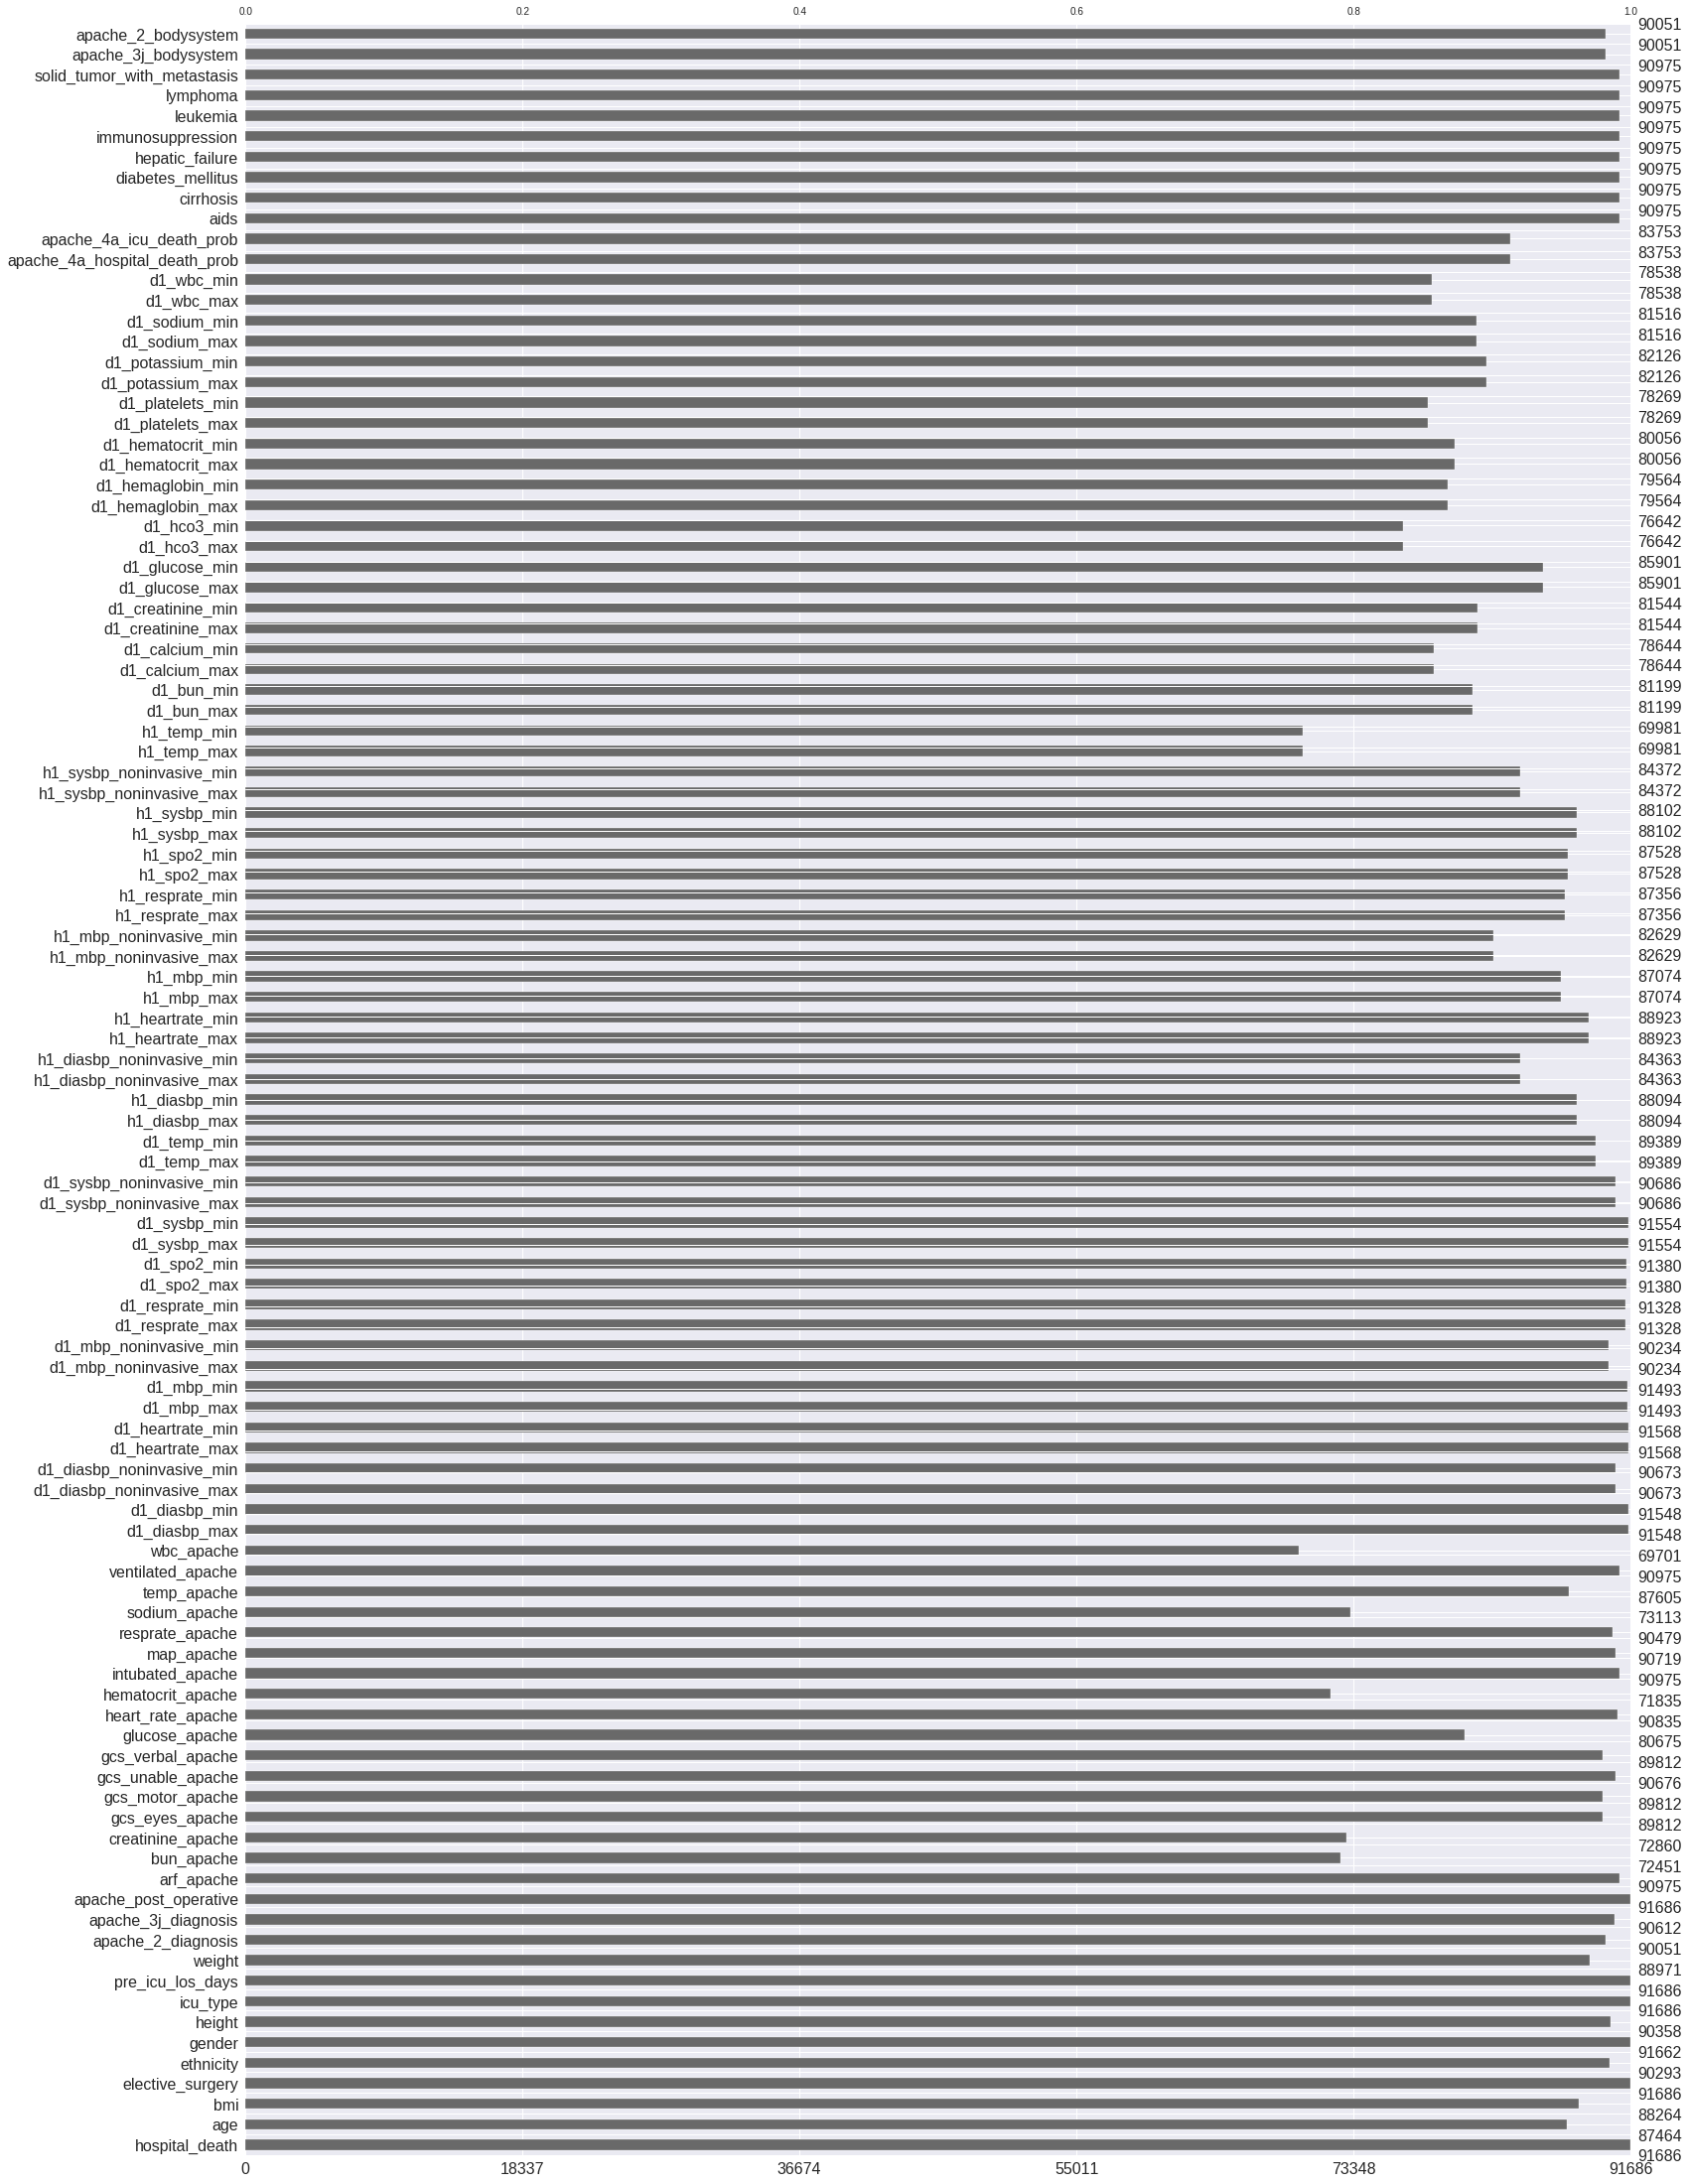

In [18]:
#let's see how much missing values has the resultant dataframe
msno.bar(df_patients)

In [20]:
print('Features and their values, after delete some features')
print('=======================')
for feature in df_patients:
    print(f'{feature} ==> {df_patients[feature].value_counts()}')

Features and their values, after delete some features
hospital_death ==> 0    83777
1     7909
Name: hospital_death, dtype: int64
age ==> 67.0    2270
68.0    2172
71.0    2141
72.0    2110
66.0    2059
        ... 
19.0     343
20.0     338
18.0     258
17.0     126
16.0      44
Name: age, Length: 74, dtype: int64
bmi ==> 14.844926    443
67.814990    422
24.017768     87
24.208110     86
27.359332     82
            ... 
23.786404      1
22.157643      1
61.796764      1
23.241435      1
47.179671      1
Name: bmi, Length: 34882, dtype: int64
elective_surgery ==> 0    74835
1    16851
Name: elective_surgery, dtype: int64
ethnicity ==> Caucasian           70663
African American     9546
Other/Unknown        4372
Hispanic             3795
Asian                1129
Native American       788
Name: ethnicity, dtype: int64
gender ==> M    49454
F    42208
Name: gender, dtype: int64
height ==> 167.6    5362
177.8    5288
160.0    5237
172.7    4832
165.1    4770
         ... 
173.6       1


#At this point, I think I am already able to impute null values using KNN